References: <br>
http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/

#### Table of Contents:
- [Matrix Factorization](#mf)
- [Factorization Machine](#fm)

### Matrix Factorization <a name="mf"></a>

#### Intro

Suppose we have this matrix that contains user-movie interactions. With rating 1-5


|   | Batman DK  | Pulp Fiction  | Star Wars IX | Parasite  |
|---|---|---|---|---|
| Lord  |  5 | 3  | -  | 1  |
| Arpi  | 4  | -  | -  | -  |
| Reja  | 1  | 3  | -  | 2  |
| Tedi | 3| - | - | -|
| Bamz |- | 5 | 4 | 3 |

And we want to know which film that we can recommend to Arpi. So how do we do it? 

We can use so-called **Matrix Factorization**

#### Matrix Factorization? 

In recommendation system, Matrix Factorization is one way to
predict hidden or latent features based on the existing interactions between the Users and their Items. In layman's terms, we can predict missing user's item ratings (or anything else) based on those users' existing ratings. 

We can do this by finding the dot product of factor matrices that based on the existing (usually sparse) matrix. Because we only know the current interactions matrix, we need to find those factor matrices.This is where we need to use some _machine learning_ shenanigans.



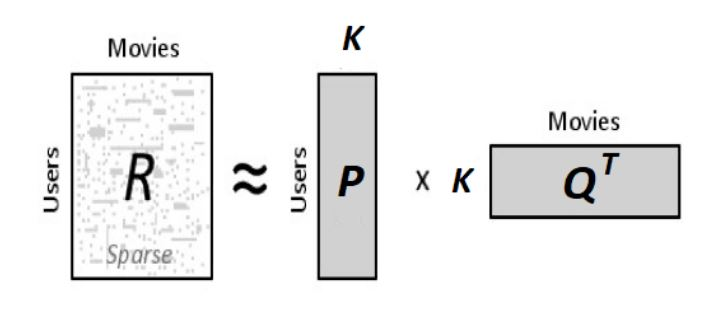

##### The basic formula of our Matrix Factorization is:

$$R\approx (P*K) \cdot (K*Q^T) = \hat{R}$$

Where:
<br>_R_ = Original Matrix
<br>_P_ = Users Rows  
<br>_Q_ = Items Columns
<br>_K_ = Number of features (Defined by ourselves, usually 2-250. We can also use cross-validation)

To get the prediction of a rating of an item _$i_j$_ by _$u_i$_ we can calculate the dot product of the two vectors corresponding to  _$i_j$_ and _$u_i$_ :

$$\hat{r}_{ij} =  p^T_i = \sum^k_{k=1}p_{ik}q_{kj}$$
<br>

To find P and Q, we need to have calculate how 'different' their product to R (the original matrix). We usually used MSE _(Mean Squared Error)_ to calculate the error:

$$e^2_{ij} = (r_{ij}-\hat{r}_{ij})^2 = (r_{ij} - \sum^k_{k=1}p_{ik}q_{kj})^2$$
<br>

Because we want to make sure our P and Q dot product matrix are having the same value, we need to minimize our error by using stochastic gradient descent. As usual, to get the gradient of current values we can differentiate mse with respect to two variables separately: 

$$\dfrac{d}{d_{p_ik}}e^2_{ij} = -2(r_{ij}-\hat{r}_{ij}) = -2e_{ij}q_{kj}$$

$$\dfrac{d}{d_{q_ik}}e^2_{ij} = -2(r_{ij}-\hat{r}_{ij}) = -2e_{ij}p_{kj}$$

With those gradient, then we can now formulate the update rules for both $p_{ik}$ and $q_{kj}$:

$$p^`_{ik} = p_{ik} + \alpha\dfrac{d}{d_{p_{ik}}}e^2_{ij} = p_{ik} + 2\alpha e_{ij}q_{kj}$$

$$q^`_{kj} = p_{kj} + \alpha\dfrac{d}{d_{q_{kj}}}e^2_{ij} = q_{kj} + 2\alpha e_{ij}p_{ik}$$

with $\alpha$ as learning rate.



#### MF Implementation

In [10]:
import numpy
xrange = range
# with regularization
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in xrange(steps):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in xrange(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T


In [11]:
R = [
     [5,3,0,1],
     [4,0,0,0],
     [1,3,0,2],
     [3,0,0,0],
     [0,5,4,3],
    ]

R = numpy.array(R)

N = len(R)
M = len(R[0])
K = 2

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)
nR = numpy.dot(nP, nQ.T)

print("original matrix: ")
display(R)
print("MF matrix: ")
display(nR)

original matrix: 


array([[5, 3, 0, 1],
       [4, 0, 0, 0],
       [1, 3, 0, 2],
       [3, 0, 0, 0],
       [0, 5, 4, 3]])

MF matrix: 


array([[4.96806196, 2.88184481, 3.32711962, 1.22070994],
       [3.97669888, 3.54281291, 2.74342725, 1.95778945],
       [1.10880369, 2.85024732, 0.88581778, 2.02352773],
       [2.97096474, 3.14812931, 2.08213411, 1.86039711],
       [5.76444137, 5.10827518, 3.97498   , 2.8163221 ]])

### Factorization Machine <a name="fm"></a>

<div style="text-align: right; font-size:32px"> つづく </div>


この番組はご覧のスポンサーで送りします。